# Analyzing Spotify Data w/ Visuals and Categorizing Songs with Machine Learning

The purpose of this project was to get familiar with the Spotify API and to practice with general data science techniques using the pandas, maplotlib, numpy, and sci-kit learn libraries. In order, this notebook does the following: 
* Plots my top artists (short-term, medium-term, and long-term) vs. their popularity levels 
* Plots my top tracks (short-term, medium-term, and long-term) vs. their durations
* Builds and evaluates machine learning models that categorize whether or not a song belongs to a more high energy workout playlist or to a more chill and relaxed playlist

In [38]:
import os
from dotenv import load_dotenv
load_dotenv()
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Retrieve variables from .env file and use them to access the Spotify API

In [4]:
client_id = os.getenv('SPOTIPY_CLIENT_ID')
client_secret = os.getenv('SPOTIPY_CLIENT_SECRET')
redirect_uri = os.getenv('SPOTIPY_REDIRECT_URI')

In [5]:
print(client_secret)

8d9ce0487e694ac297047189e6adc744


In [6]:
#the specified scopes allow us to access certain data
oauth_object = spotipy.SpotifyOAuth(client_id, client_secret, redirect_uri, scope='user-read-private user-read-email user-follow-read user-top-read') 
token_dict = oauth_object.get_cached_token()
token = token_dict['access_token'] 
spotify_obj = spotipy.Spotify(auth=token) 
curr_user = spotify_obj.current_user() 

### Get my top artists data for all three timeframes and format this data into a Pandas DataFrames

In [7]:
def get_top_artists(term_length, redacted_artist_index):
    top_dict = spotify_obj.current_user_top_artists(limit=10, offset=0, time_range=term_length)
    artist_info = top_dict['items']
    artist_df = pd.DataFrame(artist_info)
    artist_df = artist_df.drop(index=redacted_artist_index)
    artist_df = artist_df.reset_index(drop=True)
    return artist_df

In [8]:
#short-term top artists
artist_df_st = get_top_artists('short_term', 4)
artist_df_st.head()

external_urls  \
0  {'spotify': 'https://open.spotify.com/artist/3...   
1  {'spotify': 'https://open.spotify.com/artist/3...   
2  {'spotify': 'https://open.spotify.com/artist/5...   
3  {'spotify': 'https://open.spotify.com/artist/1...   
4  {'spotify': 'https://open.spotify.com/artist/2...   

                    followers  \
0  {'href': None, 'total': 0}   
1  {'href': None, 'total': 0}   
2  {'href': None, 'total': 0}   
3  {'href': None, 'total': 0}   
4  {'href': None, 'total': 0}   

                                              genres  \
0                            [indie pop, pov: indie]   
1  [canadian hip hop, canadian pop, hip hop, pop ...   
2                        [chicago rap, hip hop, rap]   
3                     [alternative r&b, chicago rap]   
4                                      [jersey club]   

                                                href                      id  \
0  https://api.spotify.com/v1/artists/3zmfs9cQwzJ...  3zmfs9cQwzJl575W1ZYXeT   
1  https://api.spotify.com/v1/artists/3TVXtAsR1In...  3TVXtAsR1Inumwj472S9r4   
2  https://api.spotify.com/v1/artists/5K4W6rqBFWD...  5K4W6rqBFWDnAN6FQUkS6x   
3  https://api.spotify.com/v1/artists/1EpyA68dKpj...  1EpyA68dKpjf7jXmQL88Hy   
4  https://api.spotify.com/v1/artists/2R0CFyeMDiR...  2R0CFyeMDiRbfkhkIMbyl1   

                                              images         name  popularity  \
0  [{'height': 640, 'url': 'https://i.scdn.co/ima...  Men I Trust          70   
1  [{'height': 640, 'url': 'https://i.scdn.co/ima...        Drake          95   
2  [{'height': 640, 'url': 'https://i.scdn.co/ima...   Kanye West          89   
3  [{'height': 640, 'url': 'https://i.scdn.co/ima...       Noname          54   
4  [{'height': 640, 'url': 'https://i.scdn.co/ima...  Cash Cobain          43   

     type                                    uri  
0  artist  spotify:artist:3zmfs9cQwzJl575W1ZYXeT  
1  artist  spotify:artist:3TVXtAsR1Inumwj472S9r4  
2  artist  spotify:artist:5K4W6rqBFWDnAN6FQUkS6x  
3  artist  spotify:artist:1EpyA68dKpjf7jXmQL88Hy  
4  artist  spotify:artist:2R0CFyeMDiRbfkhkIMbyl1

In [9]:
#medium-term top artists
artist_df_mt = get_top_artists('medium_term', 1)
artist_df_mt.head()

external_urls  \
0  {'spotify': 'https://open.spotify.com/artist/3...   
1  {'spotify': 'https://open.spotify.com/artist/2...   
2  {'spotify': 'https://open.spotify.com/artist/4...   
3  {'spotify': 'https://open.spotify.com/artist/2...   
4  {'spotify': 'https://open.spotify.com/artist/6...   

                    followers  \
0  {'href': None, 'total': 0}   
1  {'href': None, 'total': 0}   
2  {'href': None, 'total': 0}   
3  {'href': None, 'total': 0}   
4  {'href': None, 'total': 0}   

                                              genres  \
0  [canadian hip hop, canadian pop, hip hop, pop ...   
1                                      [jersey club]   
2                               [pop rap, rap, trap]   
3              [atl hip hop, melodic rap, rap, trap]   
4  [classic soul, funk, motown, philly soul, quie...   

                                                href                      id  \
0  https://api.spotify.com/v1/artists/3TVXtAsR1In...  3TVXtAsR1Inumwj472S9r4   
1  https://api.spotify.com/v1/artists/2R0CFyeMDiR...  2R0CFyeMDiRbfkhkIMbyl1   
2  https://api.spotify.com/v1/artists/4Gso3d4CscC...  4Gso3d4CscCijv0lmajZWs   
3  https://api.spotify.com/v1/artists/2hlmm7s2ICU...  2hlmm7s2ICUX0LVIhVFlZQ   
4  https://api.spotify.com/v1/artists/68kACMx6A3D...  68kACMx6A3D2BYiO056MeQ   

                                              images               name  \
0  [{'height': 640, 'url': 'https://i.scdn.co/ima...              Drake   
1  [{'height': 640, 'url': 'https://i.scdn.co/ima...        Cash Cobain   
2  [{'height': 640, 'url': 'https://i.scdn.co/ima...        Don Toliver   
3  [{'height': 640, 'url': 'https://i.scdn.co/ima...              Gunna   
4  [{'height': 640, 'url': 'https://i.scdn.co/ima...  Teddy Pendergrass   

   popularity    type                                    uri  
0          95  artist  spotify:artist:3TVXtAsR1Inumwj472S9r4  
1          43  artist  spotify:artist:2R0CFyeMDiRbfkhkIMbyl1  
2          79  artist  spotify:artist:4Gso3d4CscCijv0lmajZWs  
3          83  artist  spotify:artist:2hlmm7s2ICUX0LVIhVFlZQ  
4          55  artist  spotify:artist:68kACMx6A3D2BYiO056MeQ

In [10]:
#long-term top artists
artist_df_lt = get_top_artists('long_term', 0)
artist_df_lt.head()

external_urls  \
0  {'spotify': 'https://open.spotify.com/artist/3...   
1  {'spotify': 'https://open.spotify.com/artist/4...   
2  {'spotify': 'https://open.spotify.com/artist/1...   
3  {'spotify': 'https://open.spotify.com/artist/2...   
4  {'spotify': 'https://open.spotify.com/artist/6...   

                    followers  \
0  {'href': None, 'total': 0}   
1  {'href': None, 'total': 0}   
2  {'href': None, 'total': 0}   
3  {'href': None, 'total': 0}   
4  {'href': None, 'total': 0}   

                                              genres  \
0  [canadian hip hop, canadian pop, hip hop, pop ...   
1            [hip hop, pittsburgh rap, pop rap, rap]   
2          [adult standards, easy listening, lounge]   
3                                      [jersey club]   
4                           [melodic rap, rap, trap]   

                                                href                      id  \
0  https://api.spotify.com/v1/artists/3TVXtAsR1In...  3TVXtAsR1Inumwj472S9r4   
1  https://api.spotify.com/v1/artists/4LLpKhyESsy...  4LLpKhyESsyAXpc4laK94U   
2  https://api.spotify.com/v1/artists/1Mxqyy3pSjf...  1Mxqyy3pSjf8kZZL4QVxS0   
3  https://api.spotify.com/v1/artists/2R0CFyeMDiR...  2R0CFyeMDiRbfkhkIMbyl1   
4  https://api.spotify.com/v1/artists/6Xgp2XMz1fh...  6Xgp2XMz1fhVYe7i6yNAax   

                                              images           name  \
0  [{'height': 640, 'url': 'https://i.scdn.co/ima...          Drake   
1  [{'height': 640, 'url': 'https://i.scdn.co/ima...     Mac Miller   
2  [{'height': 650, 'url': 'https://i.scdn.co/ima...  Frank Sinatra   
3  [{'height': 640, 'url': 'https://i.scdn.co/ima...    Cash Cobain   
4  [{'height': 640, 'url': 'https://i.scdn.co/ima...   Trippie Redd   

   popularity    type                                    uri  
0          95  artist  spotify:artist:3TVXtAsR1Inumwj472S9r4  
1          80  artist  spotify:artist:4LLpKhyESsyAXpc4laK94U  
2          78  artist  spotify:artist:1Mxqyy3pSjf8kZZL4QVxS0  
3          43  artist  spotify:artist:2R0CFyeMDiRbfkhkIMbyl1  
4          79  artist  spotify:artist:6Xgp2XMz1fhVYe7i6yNAax

## Plot my top artists data for all three timeframes -- compare popularity of artists

In [11]:
def plot_top_artists(df, term_length):
    # Create the figure and axes objects
    fig, ax = plt.subplots(figsize=(12,6), dpi = 90)
    
    # Plot initial bars
    bar1 = ax.bar(df['name'], df['popularity'], width=0.6)
    # Label the axes
    ax.set_xlabel('Artist Names', fontsize=20, labelpad=8)
    ax.set_ylabel('Popularity', fontsize=20, labelpad=8)
    ax.xaxis.label.set_color('#023020')
    ax.yaxis.label.set_color('#023020')
    ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=80)
    
    # Add label on top of each bar to show precise popularity measurement
    ax.bar_label(bar1, labels=df['popularity'], padding=3, color='#000000', fontsize=8);
    ax.tick_params(colors='#023020', which='both')
    # Add in stylistic line on top
    ax.plot([0.12, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#023020', linewidth=.6)
    
    # Add in title and subtitle
    ax.text(x=0.12, y=.93, s=f'Popularity Levels of My Top Artists ({term_length})', transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
    ax.text(x=0.12, y=.90, s='Popularity is ranked from 0 (Least Popular) to 100 (Most Popular)', transform=fig.transFigure, ha='left', fontsize=12, alpha=.8);
    
    # Colours - Choose the extreme colours of the colour map
    colours = ['#A4BF5B', '#063B00']
    # Colormap - Build the colour maps
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list('colour_map', colours, N=256)
    norm = matplotlib.colors.Normalize(df['popularity'].min(), df['popularity'].max()) # linearly normalizes data into the [0.0, 1.0] interval
    # Plot stylized bars
    bar1 = ax.bar(df['name'], df['popularity'], color=cmap(norm(df['popularity'])), width=0.6)
    
    #Calculate, plot, and annotate the average line
    average = np.mean(df['popularity'])
    plt.axhline(y=average, color = '#ff0000', linewidth=3)
    ax.text(0.88, 0.82, f'Average = {average:.1f}', ha='right', va='center', color='#ff0000', style='oblique', transform=ax.transAxes, size=12, zorder=3)


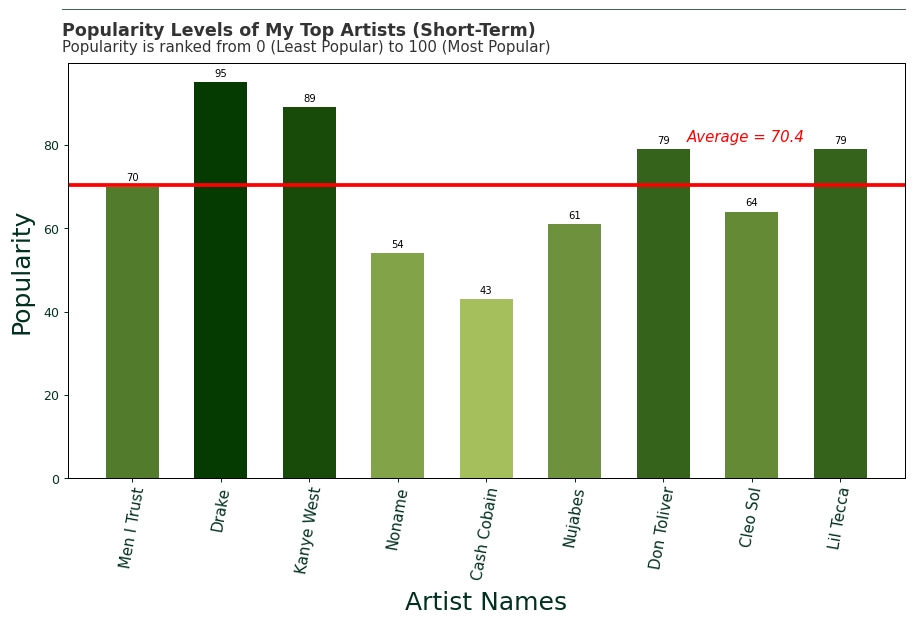

In [12]:
plot_top_artists(artist_df_st, 'Short-Term')

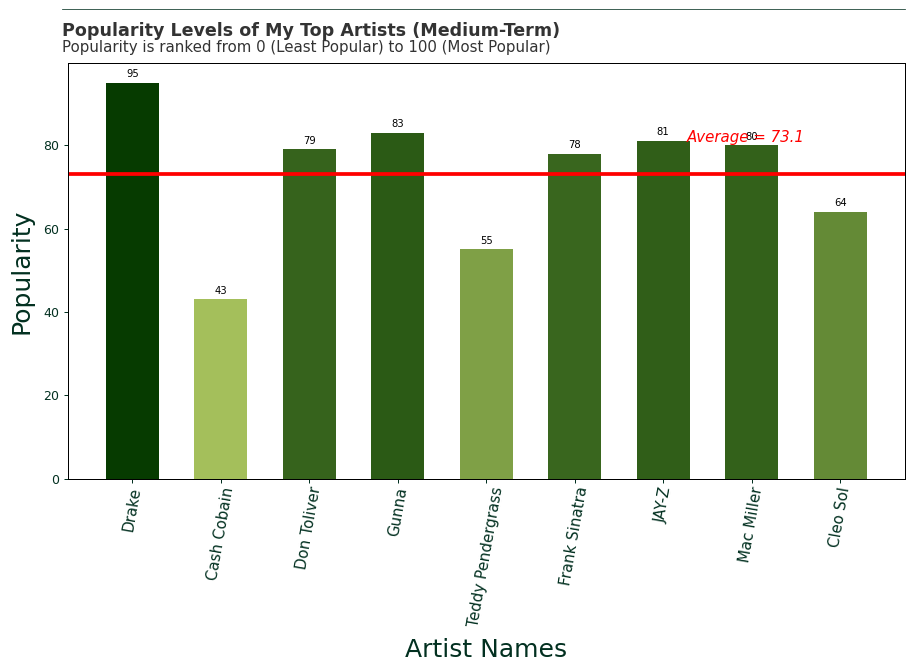

In [13]:
plot_top_artists(artist_df_mt, 'Medium-Term')

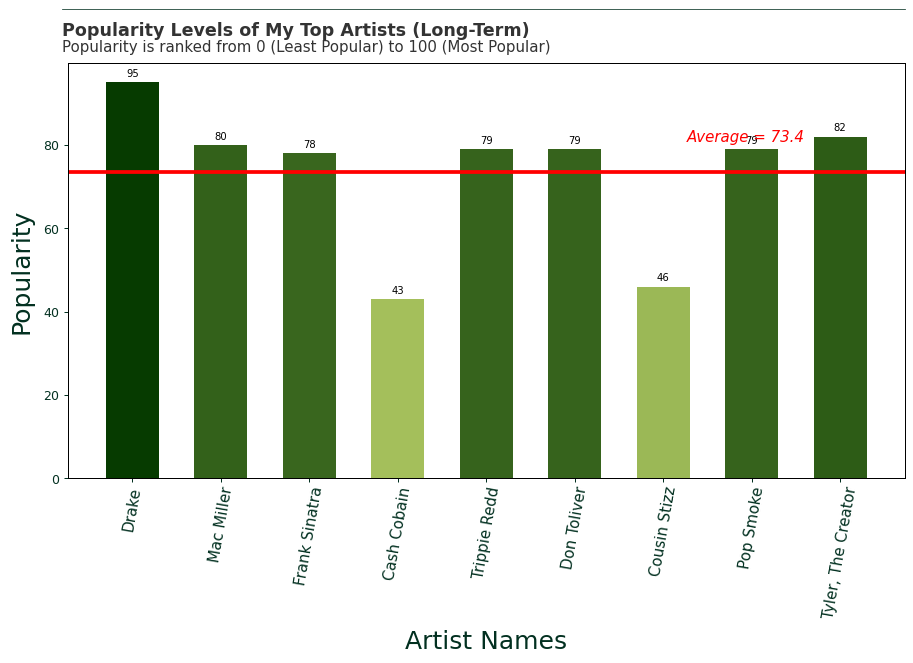

In [14]:
plot_top_artists(artist_df_lt, 'Long-Term')

### In all three timeframes, it seems that the average poplarity of my top artists lie around the 70's so it's fair to say that I listen to mostly well-known artists. It's also interesting to note that for the short-term timeframe, the two least popular artists are also the only two artists who happen to not be in the pop/rap category of music.

## Get my top track data for all three timeframes and format this data into Pandas DataFrames

In [15]:
def get_top_tracks(term_length):
    top_dict = spotify_obj.current_user_top_tracks(limit=10, offset=0, time_range=term_length)
    track_info = top_dict['items']
    track_df = pd.DataFrame(track_info)
    #converting duration from millescond to more readable minute and second format
    track_df['length'] = pd.to_datetime(track_df['duration_ms'], unit = 'ms')
    #Calculating average before stringifying
    avg = np.mean(track_df['length'])
    track_df['length'] = track_df['length'].apply(lambda x: x.strftime('%M:%S'))
    #Getting average duration in stringified format
    avg_duration = avg.strftime('%M:%S')
    #converting to float so that data can be plotted on the y axis based on value
    track_df['length'] = track_df['length'].apply(lambda x: x.replace(':','.'))
    track_df['length'] = track_df['length'].apply(lambda x: float(x))
    return track_df, avg_duration

In [16]:
track_df_st, st_avg = get_top_tracks('short_term')
track_df_st.head()

album  \
0  {'album_type': 'ALBUM', 'artists': [{'external...   
1  {'album_type': 'ALBUM', 'artists': [{'external...   
2  {'album_type': 'ALBUM', 'artists': [{'external...   
3  {'album_type': 'ALBUM', 'artists': [{'external...   
4  {'album_type': 'ALBUM', 'artists': [{'external...   

                                             artists  \
0  [{'external_urls': {'spotify': 'https://open.s...   
1  [{'external_urls': {'spotify': 'https://open.s...   
2  [{'external_urls': {'spotify': 'https://open.s...   
3  [{'external_urls': {'spotify': 'https://open.s...   
4  [{'external_urls': {'spotify': 'https://open.s...   

                                   available_markets  disc_number  \
0  [AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...            1   
1  [AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...            1   
2  [AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...            1   
3  [AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...            1   
4  [AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...            1   

   duration_ms  explicit              external_ids  \
0       312866      True  {'isrc': 'USQX92203089'}   
1       295600     False  {'isrc': 'USCA29300105'}   
2       125765      True  {'isrc': 'QZNWV2248866'}   
3        77374      True  {'isrc': 'QZFZ42027652'}   
4       251094      True  {'isrc': 'USUG12306066'}   

                                       external_urls  \
0  {'spotify': 'https://open.spotify.com/track/1I...   
1  {'spotify': 'https://open.spotify.com/track/1L...   
2  {'spotify': 'https://open.spotify.com/track/3A...   
3  {'spotify': 'https://open.spotify.com/track/1F...   
4  {'spotify': 'https://open.spotify.com/track/3e...   

                                                href                      id  \
0  https://api.spotify.com/v1/tracks/1IfELgl6y4O9...  1IfELgl6y4O99Tp3jTGYOv   
1  https://api.spotify.com/v1/tracks/1LzNfuep1bnA...  1LzNfuep1bnAUR9skqdHCK   
2  https://api.spotify.com/v1/tracks/3AebqSXzsI5o...  3AebqSXzsI5oi9N2SwzorN   
3  https://api.spotify.com/v1/tracks/1FXsWBPKRDSU...  1FXsWBPKRDSUCSeEVHD0Th   
4  https://api.spotify.com/v1/tracks/3eP13S8D5m2c...  3eP13S8D5m2cweMEg3ZDed   

   is_local                  name  popularity  \
0     False  Written in the Stars          44   
1     False         Fade Into You          83   
2     False              HORNITOS          27   
3     False              Whogives          32   
4     False        Virginia Beach          85   

                                         preview_url  track_number   type  \
0  https://p.scdn.co/mp3-preview/45686accce2d11ca...            14  track   
1  https://p.scdn.co/mp3-preview/0dcffaf834377206...             1  track   
2  https://p.scdn.co/mp3-preview/c34663d625033a02...            12  track   
3  https://p.scdn.co/mp3-preview/25646b4d2da96c1c...            10  track   
4  https://p.scdn.co/mp3-preview/53fd1aafb5d4fbca...             1  track   

                                    uri  length  
0  spotify:track:1IfELgl6y4O99Tp3jTGYOv    5.12  
1  spotify:track:1LzNfuep1bnAUR9skqdHCK    4.55  
2  spotify:track:3AebqSXzsI5oi9N2SwzorN    2.05  
3  spotify:track:1FXsWBPKRDSUCSeEVHD0Th    1.17  
4  spotify:track:3eP13S8D5m2cweMEg3ZDed    4.11

In [17]:
track_df_mt, mt_avg = get_top_tracks('medium_term')
track_df_mt.head()

album  \
0  {'album_type': 'ALBUM', 'artists': [{'external...   
1  {'album_type': 'ALBUM', 'artists': [{'external...   
2  {'album_type': 'ALBUM', 'artists': [{'external...   
3  {'album_type': 'ALBUM', 'artists': [{'external...   
4  {'album_type': 'ALBUM', 'artists': [{'external...   

                                             artists  \
0  [{'external_urls': {'spotify': 'https://open.s...   
1  [{'external_urls': {'spotify': 'https://open.s...   
2  [{'external_urls': {'spotify': 'https://open.s...   
3  [{'external_urls': {'spotify': 'https://open.s...   
4  [{'external_urls': {'spotify': 'https://open.s...   

                                   available_markets  disc_number  \
0  [AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...            1   
1  [AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...            1   
2  [AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...            1   
3  [AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...            1   
4  [AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...            1   

   duration_ms  explicit              external_ids  \
0       312866      True  {'isrc': 'USQX92203089'}   
1       234693     False  {'isrc': 'USUM72308572'}   
2       279451     False  {'isrc': 'GBKPL2144831'}   
3       195720      True  {'isrc': 'USCM51800202'}   
4       251094      True  {'isrc': 'USUG12306066'}   

                                       external_urls  \
0  {'spotify': 'https://open.spotify.com/track/1I...   
1  {'spotify': 'https://open.spotify.com/track/0K...   
2  {'spotify': 'https://open.spotify.com/track/4H...   
3  {'spotify': 'https://open.spotify.com/track/0z...   
4  {'spotify': 'https://open.spotify.com/track/3e...   

                                                href                      id  \
0  https://api.spotify.com/v1/tracks/1IfELgl6y4O9...  1IfELgl6y4O99Tp3jTGYOv   
1  https://api.spotify.com/v1/tracks/0KoBrntyQ2x6...  0KoBrntyQ2x6Y1eZwgGe5P   
2  https://api.spotify.com/v1/tracks/4HvvHSzR1fAS...  4HvvHSzR1fAS653pHO5XTu   
3  https://api.spotify.com/v1/tracks/0zqy3ss4CwD6...  0zqy3ss4CwD6u4QPksS0nI   
4  https://api.spotify.com/v1/tracks/3eP13S8D5m2c...  3eP13S8D5m2cweMEg3ZDed   

   is_local                                               name  popularity  \
0     False                               Written in the Stars          44   
1     False  Givin’ Up (Not The One) (Don Toliver & 21 Sava...          70   
2     False                                Under the Same Name          52   
3     False                                        8 Out Of 10          62   
4     False                                     Virginia Beach          85   

                                         preview_url  track_number   type  \
0  https://p.scdn.co/mp3-preview/45686accce2d11ca...            14  track   
1  https://p.scdn.co/mp3-preview/d28ed256d49b1446...            12  track   
2  https://p.scdn.co/mp3-preview/439368e466bee55e...            10  track   
3  https://p.scdn.co/mp3-preview/cb1c149a15e507c4...             7  track   
4  https://p.scdn.co/mp3-preview/53fd1aafb5d4fbca...             1  track   

                                    uri  length  
0  spotify:track:1IfELgl6y4O99Tp3jTGYOv    5.12  
1  spotify:track:0KoBrntyQ2x6Y1eZwgGe5P    3.54  
2  spotify:track:4HvvHSzR1fAS653pHO5XTu    4.39  
3  spotify:track:0zqy3ss4CwD6u4QPksS0nI    3.15  
4  spotify:track:3eP13S8D5m2cweMEg3ZDed    4.11

In [18]:
track_df_lt, lt_avg = get_top_tracks('long_term')
track_df_lt.head()

album  \
0  {'album_type': 'ALBUM', 'artists': [{'external...   
1  {'album_type': 'ALBUM', 'artists': [{'external...   
2  {'album_type': 'ALBUM', 'artists': [{'external...   
3  {'album_type': 'ALBUM', 'artists': [{'external...   
4  {'album_type': 'SINGLE', 'artists': [{'externa...   

                                             artists  \
0  [{'external_urls': {'spotify': 'https://open.s...   
1  [{'external_urls': {'spotify': 'https://open.s...   
2  [{'external_urls': {'spotify': 'https://open.s...   
3  [{'external_urls': {'spotify': 'https://open.s...   
4  [{'external_urls': {'spotify': 'https://open.s...   

                                   available_markets  disc_number  \
0  [AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...            1   
1  [AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...            1   
2  [AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...            1   
3  [AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...            1   
4                                                 []            1   

   duration_ms  explicit              external_ids  \
0       312866      True  {'isrc': 'USQX92203089'}   
1       133762      True  {'isrc': 'USUG12104407'}   
2       326533     False  {'isrc': 'USSM11804486'}   
3       329426      True  {'isrc': 'USAT21402742'}   
4       214588     False  {'isrc': 'QZK6J2131668'}   

                                       external_urls  \
0  {'spotify': 'https://open.spotify.com/track/1I...   
1  {'spotify': 'https://open.spotify.com/track/1P...   
2  {'spotify': 'https://open.spotify.com/track/7b...   
3  {'spotify': 'https://open.spotify.com/track/0x...   
4  {'spotify': 'https://open.spotify.com/track/3x...   

                                                href                      id  \
0  https://api.spotify.com/v1/tracks/1IfELgl6y4O9...  1IfELgl6y4O99Tp3jTGYOv   
1  https://api.spotify.com/v1/tracks/1PDP7mLiAMwh...  1PDP7mLiAMwhfmgIwzhOm2   
2  https://api.spotify.com/v1/tracks/7bKxc7UstlRx...  7bKxc7UstlRxOtNBvLjGSs   
3  https://api.spotify.com/v1/tracks/0xdYzkbBBfTe...  0xdYzkbBBfTevSyOJqWUSX   
4  https://api.spotify.com/v1/tracks/3xO7yLHU8cTg...  3xO7yLHU8cTglvxXHFdrSc   

   is_local                                         name  popularity  \
0     False                         Written in the Stars          44   
1     False                           Yebba’s Heartbreak          81   
2     False                   It Gets Better (With Time)          54   
3     False  Sky's the Limit (feat. 112) - 2014 Remaster          63   
4     False                               retire (final)           0   

                                         preview_url  track_number   type  \
0  https://p.scdn.co/mp3-preview/45686accce2d11ca...            14  track   
1  https://p.scdn.co/mp3-preview/38439c23dba48a33...            11  track   
2  https://p.scdn.co/mp3-preview/b5b25242e2bb5ad8...             9  track   
3  https://p.scdn.co/mp3-preview/5eabbcaee521d7f6...            20  track   
4                                               None             4  track   

                                    uri  length  
0  spotify:track:1IfELgl6y4O99Tp3jTGYOv    5.12  
1  spotify:track:1PDP7mLiAMwhfmgIwzhOm2    2.13  
2  spotify:track:7bKxc7UstlRxOtNBvLjGSs    5.26  
3  spotify:track:0xdYzkbBBfTevSyOJqWUSX    5.29  
4  spotify:track:3xO7yLHU8cTglvxXHFdrSc    3.34

## Plot my top track data for all three timeframes -- compare duration of tracks

In [19]:
def plot_top_tracks(df, term_length, avg):
    # Create the figure and axes objects
    fig, ax = plt.subplots(figsize=(12,6), dpi = 90)
    
    # Plot initial bars
    bar1 = ax.bar(df['name'], df['length'], width=0.6)
    
    # Label the axes
    ax.set_xlabel('Song Names', fontsize=20, labelpad=8)
    ax.set_ylabel('Song Duration in Minutes', fontsize=20, labelpad=8)
    ax.xaxis.label.set_color('#FD6A02')
    ax.yaxis.label.set_color('#FD6A02')
    ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=80)
    
    # Add label on top of each bar to show precise duration length
    ax.bar_label(bar1, labels=df['length'], padding=3, color='#000000', fontsize=8);
    ax.tick_params(colors='#FD6A02', which='both')
    # Add in stylistic line on top
    ax.plot([0.12, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#FD6A02', linewidth=.6)
    
    # Add in title and subtitle
    ax.text(x=0.12, y=.93, s=f'Durations of My Top Songs ({term_length})', transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
    ax.text(x=0.12, y=.90, s='Duration is measured in minutes and seconds', transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)
    
    # Colours - Choose the extreme colours of the colour map
    colours = ['#FFD580', '#FF7518']
    # Colormap - Build the colour maps
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list('colour_map', colours, N=256)
    norm = matplotlib.colors.Normalize(df['length'].min(), df['length'].max()) # linearly normalizes data into the [0.0, 1.0] interval
    # Plot stylized bars
    bar1 = ax.bar(df['name'], df['length'], color=cmap(norm(df['length'])), width=0.6, )
    
    #Calculate, plot, and annotate the average line
    average = np.mean(track_df_st['length'])
    plt.axhline(y=average, color = '#ff0000', linewidth=3)
    ax.text(0.75, 0.77, f'Average = {avg}', ha='right', va='center', color='#ff0000', style='oblique', transform=ax.transAxes, size=12, zorder=3)

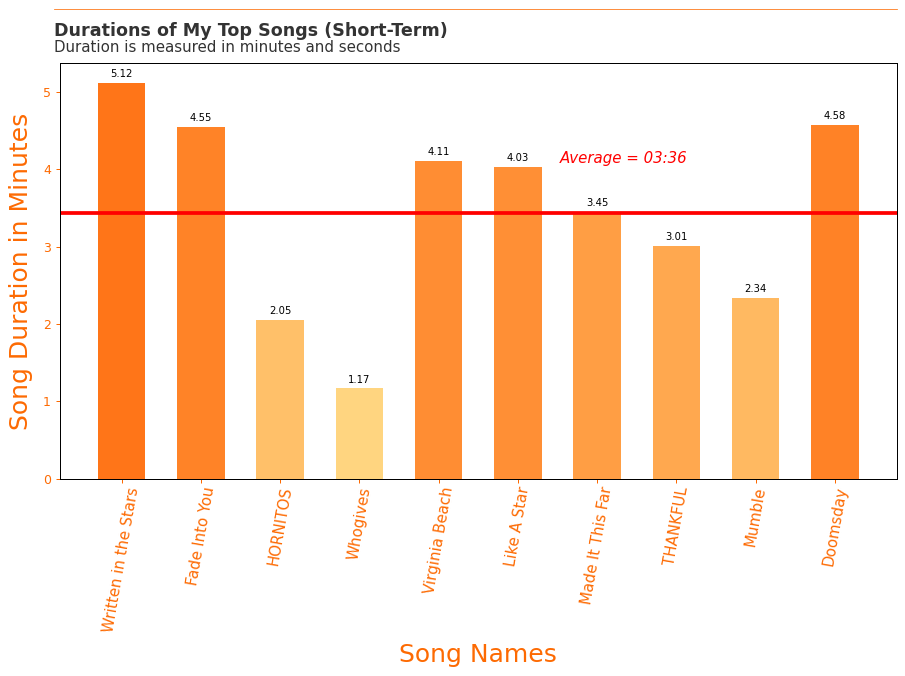

In [20]:
plot_top_tracks(track_df_st, 'Short-Term', st_avg)

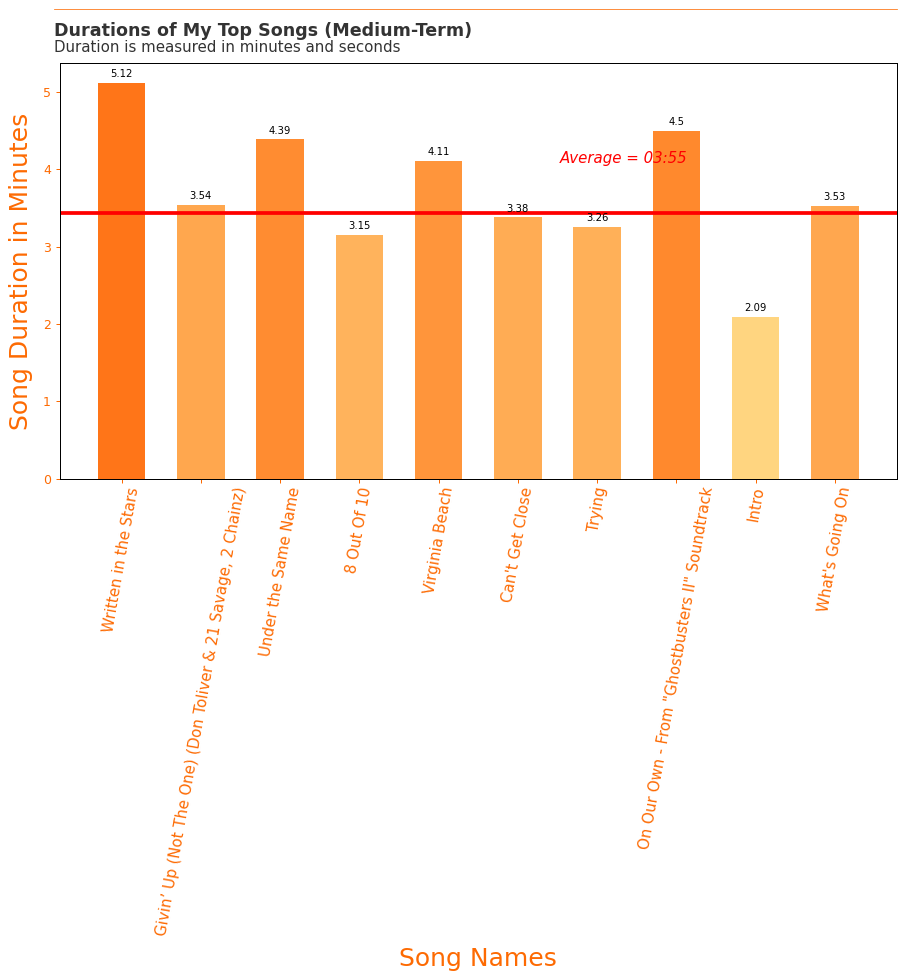

In [21]:
plot_top_tracks(track_df_mt, 'Medium-Term', mt_avg)

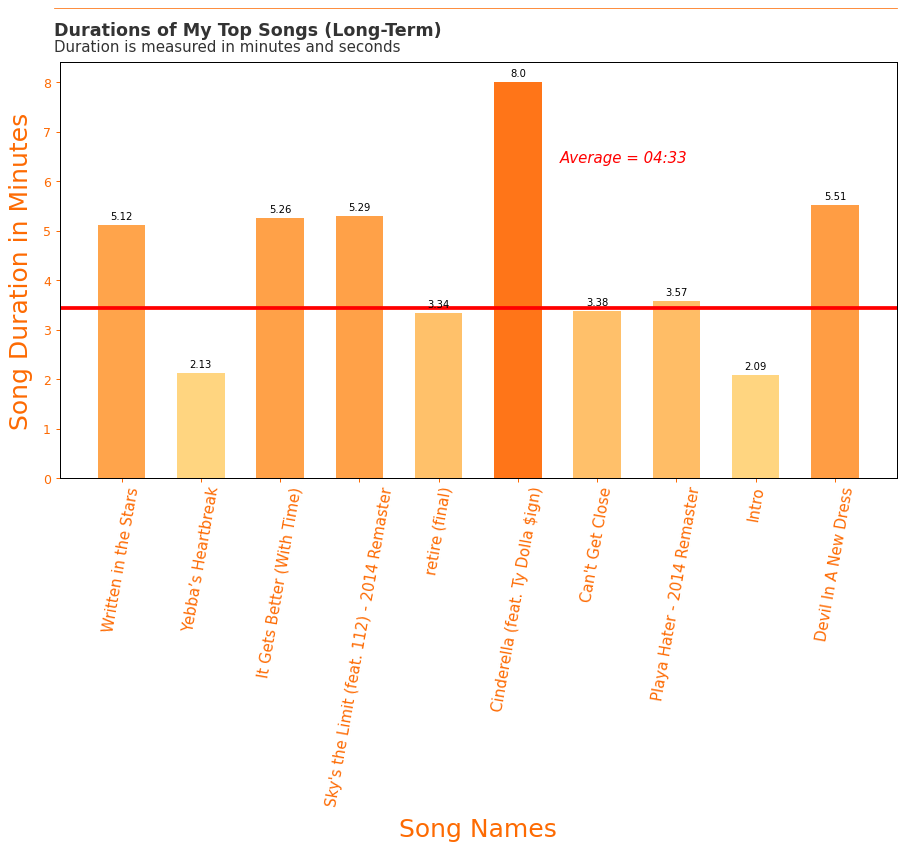

In [22]:
plot_top_tracks(track_df_lt, 'Long-Term', lt_avg)

### It's interesting to note how a lot of the songs that I enjoy tend to be on the longer side -- all of my #1 throughout each timeframe have a duration of more than 5 seconds. This is especially intriguing when you consider the following article, which cites how there seems to be a trend in which shorter songs (around 3 minutes) do much better in terms of popularity and streams. 
https://www.statista.com/chart/26546/mean-song-duration-of-currently-streamable-songs-by-year-of-release/#:~:text=Music%20through%20the%20decades&text=The%20average%20song%20released%20on,song%20lengths%20starting%20in%201990.

# Machine Learning Segment
## First, for each track from both playlists, the features must be retrieved and then correctly formatted into a pandas dataframe

In [23]:
def get_track_features(playlist_link, cat_label):
    #get playlist and only get track info
    playlist = spotify_obj.playlist(playlist_link)
    tracks = playlist['tracks']
    #get uris for each track
    uri_list = []
    track_list = tracks['items']
    for track in track_list:
        uri_list.append(track['track']['uri'])
    #get audio features for each track
    uri_audio_features = spotify_obj.audio_features(uri_list)
    #create initial dataframe with 1 row and transform data to fit this format
    audio_feats = uri_audio_features[0].items()
    audio_data = list(audio_feats)
    np_arr_audio = np.array(audio_data)
    features_df = pd.DataFrame(np_arr_audio.T)
    #loop through rest of the data and after transforming each track's data, append it to the dataframe as a new row
    for curr_dict in uri_audio_features[1:]:
        #ensure the value isn't null (Spotify has none objects randomly appear in track info)
        if curr_dict:
            audio_data = list(curr_dict.items())
            np_arr_audio = np.array(audio_data)
            new_row = np_arr_audio.T
            features_df.loc[len(features_df)] = new_row[1]
            features_df.columns = features_df.iloc[0]

    #make the first row the column names and reset index after doing so
    features_df = features_df[1:]
    features_df.reset_index(drop=True, inplace=True)
    
    #add a column to indicate what category the song belongs to (chill or workout)
    features_df.loc[:, 'category'] = cat_label
    return features_df

In [24]:
workout_df = get_track_features('https://open.spotify.com/playlist/37i9dQZF1EIgzSCNweQzPQ?si=f4c5b1e4b7b748b1', 0)
workout_df.head()

0 danceability energy key loudness mode speechiness acousticness  \
0        0.693  0.504   6   -8.306    1       0.238      0.00299   
1        0.819  0.626  10   -4.574    0       0.202      0.00748   
2        0.877  0.517   2   -5.426    0      0.0706        0.217   
3        0.521  0.526   1   -8.691    1       0.276        0.131   
4         0.53  0.884   0   -5.581    0       0.457        0.332   

0 instrumentalness liveness valence    tempo            type  \
0                0    0.695   0.723  102.139  audio_features   
1            0.101    0.167   0.415   143.01  audio_features   
2                0    0.143   0.255  119.996  audio_features   
3         0.000577    0.173   0.179  161.571  audio_features   
4         1.98e-06    0.355    0.28   87.194  audio_features   

0                      id                                   uri  \
0  4UQMOPSUVJVicIQzjAcRRZ  spotify:track:4UQMOPSUVJVicIQzjAcRRZ   
1  5SWnsxjhdcEDc7LJjq9UHk  spotify:track:5SWnsxjhdcEDc7LJjq9UHk   
2  5BbdKBZO0TH0GhfxUfyhL9  spotify:track:5BbdKBZO0TH0GhfxUfyhL9   
3  1UsQe17Ef7tV1ahFqHEFR3  spotify:track:1UsQe17Ef7tV1ahFqHEFR3   
4  3fpTMuD1u3gJlVI4FadVHs  spotify:track:3fpTMuD1u3gJlVI4FadVHs   

0                                         track_href  \
0  https://api.spotify.com/v1/tracks/4UQMOPSUVJVi...   
1  https://api.spotify.com/v1/tracks/5SWnsxjhdcED...   
2  https://api.spotify.com/v1/tracks/5BbdKBZO0TH0...   
3  https://api.spotify.com/v1/tracks/1UsQe17Ef7tV...   
4  https://api.spotify.com/v1/tracks/3fpTMuD1u3gJ...   

0                                       analysis_url duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/4UQM...      167600   
1  https://api.spotify.com/v1/audio-analysis/5SWn...      195906   
2  https://api.spotify.com/v1/audio-analysis/5Bbd...      162053   
3  https://api.spotify.com/v1/audio-analysis/1UsQ...      310960   
4  https://api.spotify.com/v1/audio-analysis/3fpT...      319387   

0 time_signature  category  
0              4         0  
1              4         0  
2              4         0  
3              4         0  
4              4         0

In [25]:
chill_df = get_track_features('https://open.spotify.com/playlist/37i9dQZF1EIcNUtFW3CJZc?si=670a71cb3a8446b7', 1)
chill_df.head()

0 danceability energy key loudness mode speechiness acousticness  \
0        0.414  0.473  11   -8.911    0       0.116        0.663   
1        0.476  0.161   8  -11.665    0      0.0407        0.967   
2        0.587  0.286   9   -8.839    1      0.0315        0.185   
3          0.7  0.414   0  -10.864    1      0.0373        0.849   
4        0.723   0.47   6  -11.302    0       0.028        0.633   

0 instrumentalness liveness valence    tempo            type  \
0           0.0523    0.128   0.409    100.0  audio_features   
1           0.0381    0.109  0.0908  119.614  audio_features   
2           0.0288    0.214   0.302   71.123  audio_features   
3           0.0606    0.107   0.444   60.479  audio_features   
4           0.0373   0.0968   0.783   97.107  audio_features   

0                      id                                   uri  \
0  6FBzhcfgGacfXF3AmtfEaX  spotify:track:6FBzhcfgGacfXF3AmtfEaX   
1  1PDP7mLiAMwhfmgIwzhOm2  spotify:track:1PDP7mLiAMwhfmgIwzhOm2   
2  2VYnlKxB8jpbCeLUjQsebc  spotify:track:2VYnlKxB8jpbCeLUjQsebc   
3  5tqZJUHEuqdN12RZVq2l9p  spotify:track:5tqZJUHEuqdN12RZVq2l9p   
4  65krtHkaYLPr0mEbjL61UP  spotify:track:65krtHkaYLPr0mEbjL61UP   

0                                         track_href  \
0  https://api.spotify.com/v1/tracks/6FBzhcfgGacf...   
1  https://api.spotify.com/v1/tracks/1PDP7mLiAMwh...   
2  https://api.spotify.com/v1/tracks/2VYnlKxB8jpb...   
3  https://api.spotify.com/v1/tracks/5tqZJUHEuqdN...   
4  https://api.spotify.com/v1/tracks/65krtHkaYLPr...   

0                                       analysis_url duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/6FBz...      129698   
1  https://api.spotify.com/v1/audio-analysis/1PDP...      133763   
2  https://api.spotify.com/v1/audio-analysis/2VYn...      224680   
3  https://api.spotify.com/v1/audio-analysis/5tqZ...      406467   
4  https://api.spotify.com/v1/audio-analysis/65kr...      251333   

0 time_signature  category  
0              4         1  
1              4         1  
2              4         1  
3              4         1  
4              4         1

## Only use the columns that make sense in terms of features of a song, then combine the two dataframes

In [26]:
workout_data = workout_df[['danceability','energy','speechiness','acousticness','instrumentalness','tempo', 'category']]
chill_data = chill_df[['danceability','energy','speechiness','acousticness','instrumentalness','tempo', 'category']]
training_data = pd.concat([workout_data,chill_data], axis=0, join='outer', ignore_index=True)
training_data

0  danceability energy speechiness acousticness instrumentalness    tempo  \
0         0.693  0.504       0.238      0.00299                0  102.139   
1         0.819  0.626       0.202      0.00748            0.101   143.01   
2         0.877  0.517      0.0706        0.217                0  119.996   
3         0.521  0.526       0.276        0.131         0.000577  161.571   
4          0.53  0.884       0.457        0.332         1.98e-06   87.194   
..          ...    ...         ...          ...              ...      ...   
95        0.392  0.429      0.0462        0.527            0.015   72.104   
96        0.498  0.634      0.0475        0.328            0.748   93.161   
97        0.739  0.491       0.027        0.791           0.0366  111.008   
98        0.674  0.487      0.0331        0.169          0.00411   132.97   
99        0.753  0.705       0.084        0.259            0.146   93.954   

0   category  
0          0  
1          0  
2          0  
3          0  
4          0  
..       ...  
95         1  
96         1  
97         1  
98         1  
99         1  

[100 rows x 7 columns]

## Build A Correlation Matrix - see which features have a strong relationship with the category type

In [27]:
training_data.corr()

0                 danceability    energy  speechiness  acousticness  \
0                                                                     
danceability          1.000000  0.235384     0.352440     -0.400604   
energy                0.235384  1.000000     0.399540     -0.604702   
speechiness           0.352440  0.399540     1.000000     -0.450226   
acousticness         -0.400604 -0.604702    -0.450226      1.000000   
instrumentalness     -0.229833 -0.159529    -0.275327      0.321593   
tempo                 0.211846  0.104932     0.174920     -0.288563   
category             -0.477362 -0.593936    -0.752161      0.666732   

0                 instrumentalness     tempo  category  
0                                                       
danceability             -0.229833  0.211846 -0.477362  
energy                   -0.159529  0.104932 -0.593936  
speechiness              -0.275327  0.174920 -0.752161  
acousticness              0.321593 -0.288563  0.666732  
instrumentalness          1.000000 -0.048153  0.369837  
tempo                    -0.048153  1.000000 -0.218433  
category                  0.369837 -0.218433  1.000000

## Visualize the correlation matrix

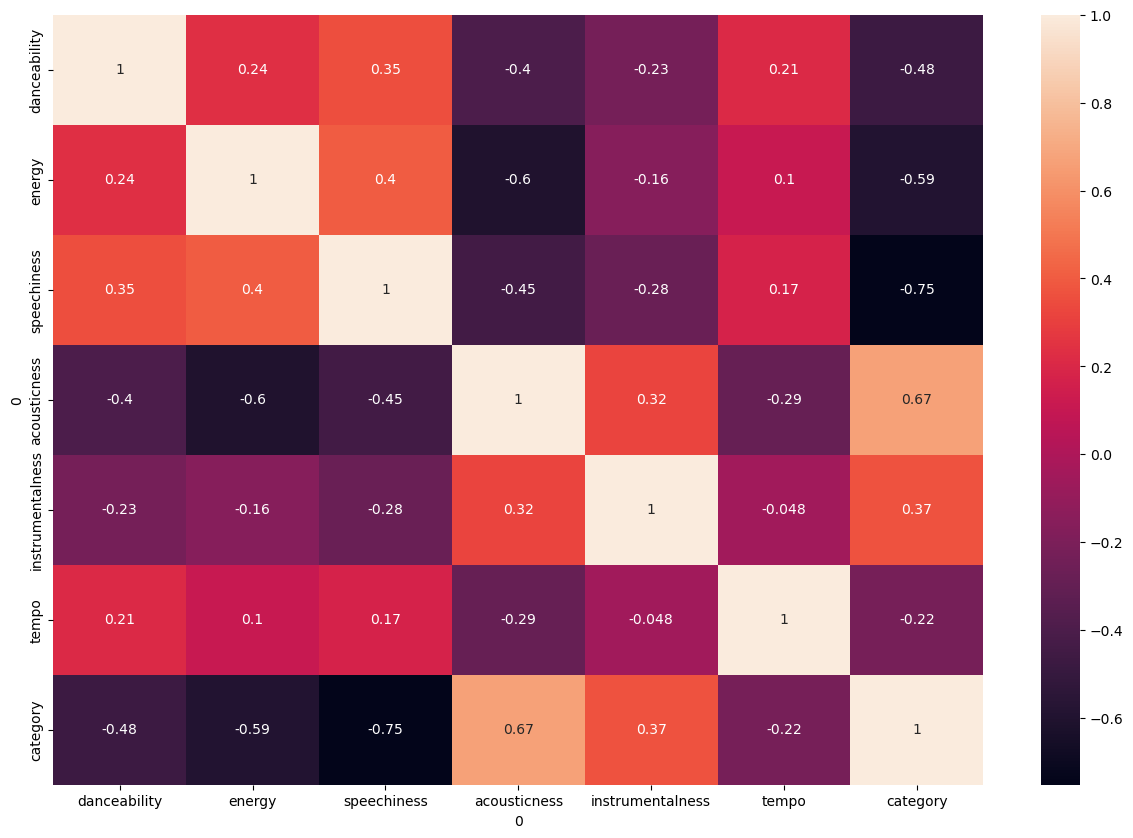

In [28]:
corr_matrix = training_data.corr()
fix, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, annot=True)

## Split the data into train and test -- then use three different classifiers to evaluate the data

In [30]:
# Split data into X and y
X = training_data.drop('category', axis=1)
y = training_data['category']

#Split data into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
# Put models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'Random Forest': RandomForestClassifier()}

#Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    #Set random seed
    np.random.seed(42)
    #Make a dict to keep model scores
    model_scores = {}
    #Loop through models
    for name, model in models.items():
        #Fit the model
        model.fit(X_train, y_train)
        #Evaluate the model and append its scores to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [32]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test);

In [33]:
model_scores

{'Logistic Regression': 0.85, 'KNN': 0.5, 'Random Forest': 1.0}

# Hyperparameter Tuning with RandomizedSearchCV
### Tuning will be done on the Logistic Regression & Random Forest models since those seem to have the most potential

In [50]:
#Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 800, 50),
          "max_depth": [None, 4, 7, 10],
          "min_samples_split": np.arange(2, 18, 2),
          "min_samples_leaf": np.arange(1, 18, 2)}

# Create a hyperparameter grid for LogisticRegression
log_grid = {"C": np.logspace(-4, 44, 20),
               "solver": ["liblinear"]}

In [52]:
np.random.seed(22)
#Setup random hyperparameter search for Random Forest Classifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                               param_distributions = rf_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model for Random Forest Classifier
rs_rf.fit(X_train, y_train);

#Get the best parameters
rs_rf.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'n_estimators': 610,
 'min_samples_split': 16,
 'min_samples_leaf': 11,
 'max_depth': None}

In [53]:
rs_rf.score(X_test, y_test)

1.0

In [54]:
np.random.seed(22)

#Setup random hyperparameter search for Logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(), 
                               param_distributions = log_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model for Logistic Regression
rs_log_reg.fit(X_train, y_train);

#Get the best parameters
rs_log_reg.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'solver': 'liblinear', 'C': 3792.690190732246}

In [55]:
rs_log_reg.score(X_test, y_test)

1.0

## Initial Thoughts
### It seems that Random Forest is the best model as it has a 95% accuracy rate while K Nearest Neighbors has the worst performance. It's interesting to consdier this because it seems that whenever I use classifiers, K Nearest Neighbors tends to have the worst performance. 

## Thoughts after RandomizedSearchCV: Getting 100% accuracy for both -- this is strange, there might be an error with the actual data itself -- maybe there's duplicates or a class imbalance. Will have to research this later.

# Future Work - there's a lot more to do in order to better work with the models such as the following:
* Use a correlation matrix to better determine what features contirbute to a song being categorized as more of a workout song or a chill song ✅
* Use RandomizedSearchCV in an attempt to improve the models ✅
* Look into RandomizedSearchCV accuracy issue
* Get more song data for each category
* Visualize the features of each genre with plots
* Better visualize and understand where each classifier is struggling to make the correct classification

Reference for making the plots look nicer: https://towardsdatascience.com/5-steps-to-build-beautiful-bar-charts-with-python-3691d434117a